# EDA combined data

### 1. Basic EDA results
Using ydata_profiling, a famous autoEDA tool.

In [59]:
import os
from pathlib import Path
import pandas as pd
from ydata_profiling import ProfileReport

data_dir = Path.cwd().parent/"data"
result_dir = Path.cwd().parent/"visualization"
os.makedirs(result_dir, exist_ok=True)

df = pd.read_csv(data_dir/"combined.csv")

profile = ProfileReport(df, explorative=True)
profile.to_file(result_dir/"ydata_profiling_result.html")

Export report to file: 100%|██████████| 1/1 [00:00<00:00, 736.75it/s]


### 2. Apply BoxCox transformation
Due to the right-skewness of the data, try applying BoxCox transformation.

You can check data's skewness in the profiling result of ydata_profiling.

In [61]:
from scipy import stats

def boxcox_transform(series_: pd.Series):
    series = series_.copy()
    notna_mask = series.notna()
    series[notna_mask], _ = stats.boxcox(series[notna_mask])
    return series

df["Number of Bed-places(BoxCox)"] = boxcox_transform(df["Number of Bed-places"])
df["Percentage of individuals(BoxCox)"] = boxcox_transform(df["Percentage of individuals"])

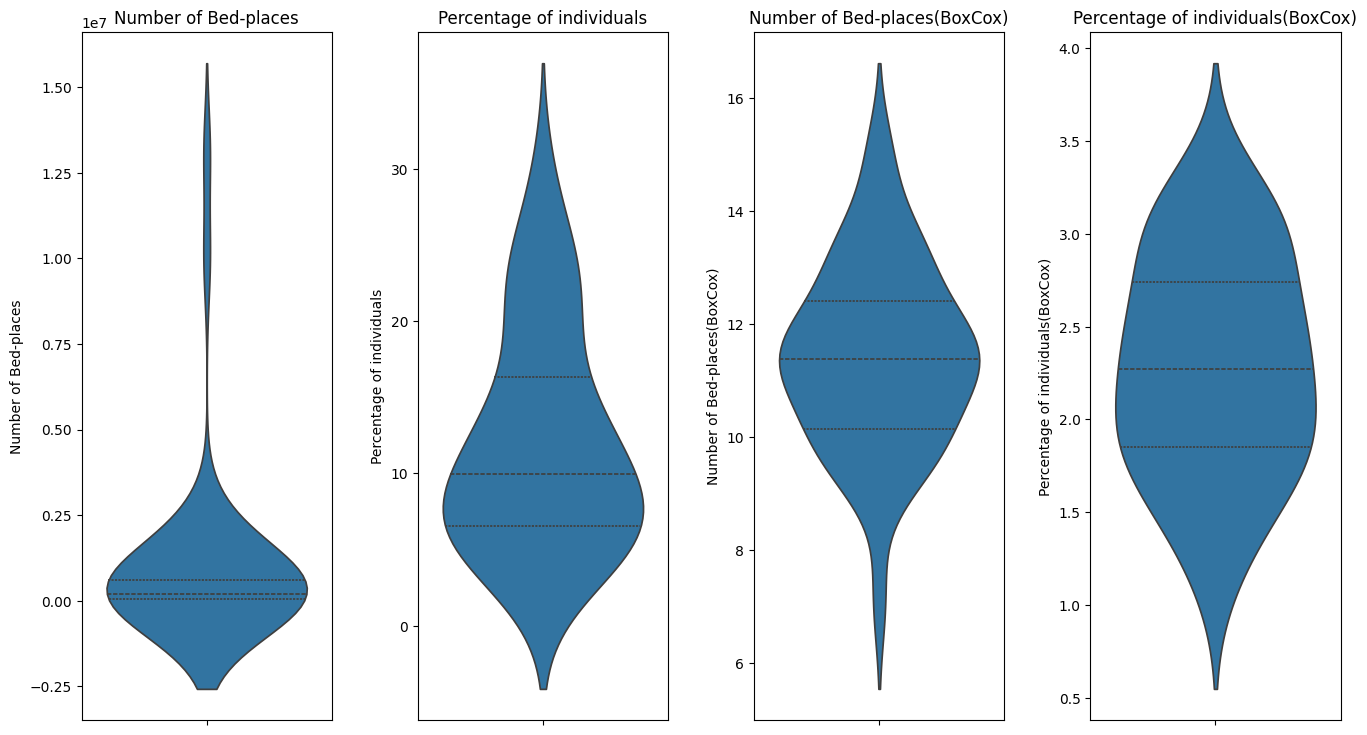

In [62]:
import matplotlib.pyplot as plt
import seaborn as sns

num_cols = ["Number of Bed-places", "Percentage of individuals"]
log_cols = [c+"(BoxCox)" for c in num_cols]

fig, axes = plt.subplots(1, 4, figsize=(14, 8))
for i, col in enumerate(num_cols+log_cols):
    sns.violinplot(y=df[col], ax=axes[i], inner="quartile")
    axes[i].set_title(col)

plt.tight_layout(pad=2.5)
plt.show()

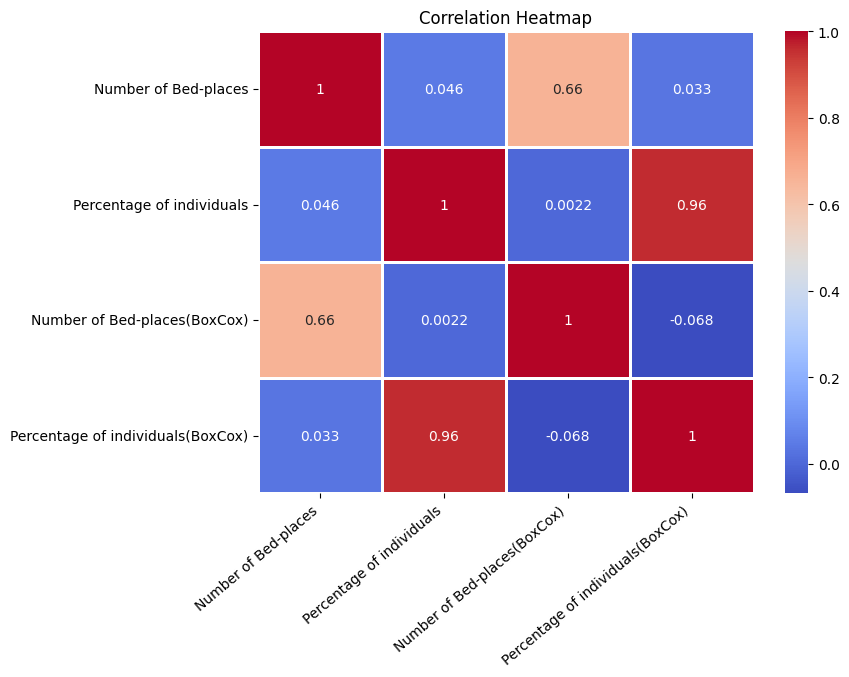

In [67]:
corr_matrix = df[num_cols+log_cols].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", linewidths=1.0)
plt.title("Correlation Heatmap")
plt.xticks(rotation=40, ha='right')
plt.show()

<Figure size 3000x3000 with 0 Axes>

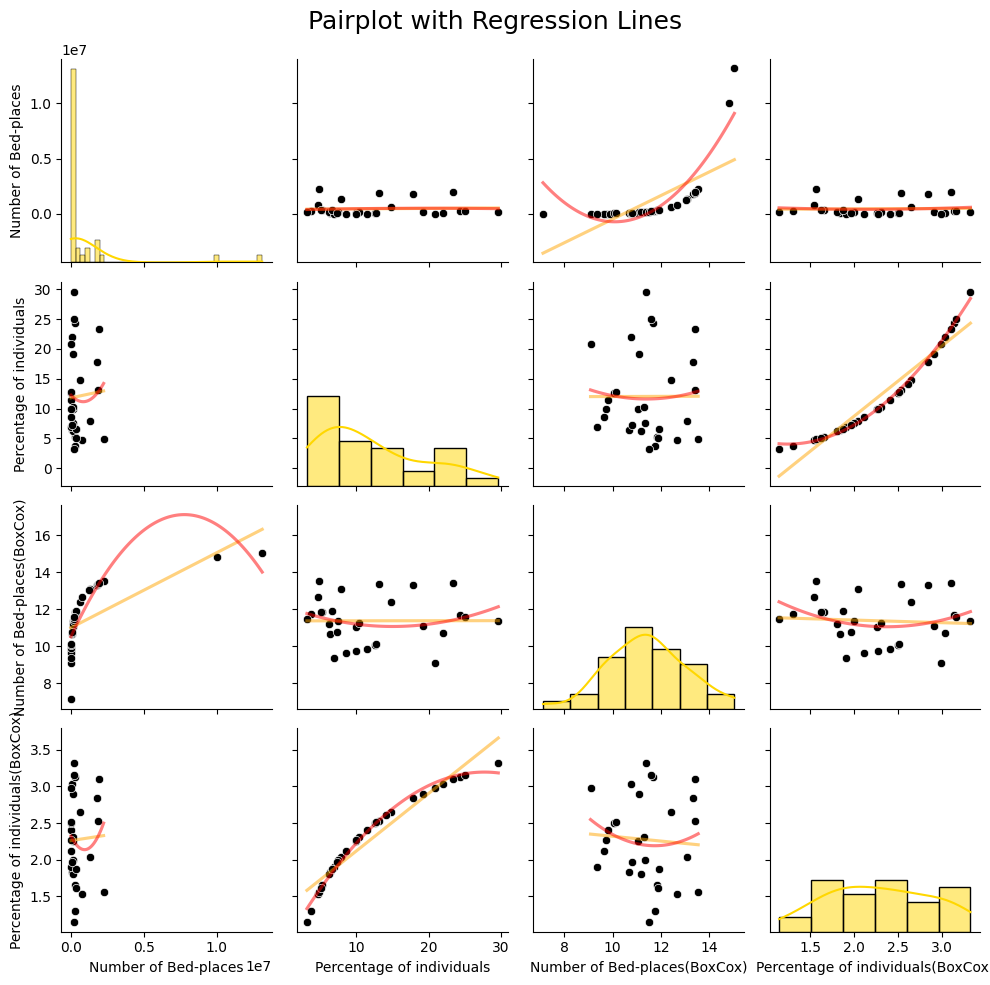

In [113]:
# Create figure
plt.figure(figsize=(30, 30))

# Drawing PairGrid plot with regression
g = sns.PairGrid(df[num_cols+log_cols])
g.map_diag(sns.histplot, color="gold", edgecolor="black", kde=True)
g.map_offdiag(sns.scatterplot, color="black")
g.map_offdiag(sns.regplot, scatter=False, ci=False, order=1, line_kws={'color': 'orange', 'alpha': 0.5})
g.map_offdiag(sns.regplot, scatter=False, ci=False, order=2, line_kws={'color': 'red', 'alpha': 0.5})

# Show the plot
plt.suptitle("Pairplot with Regression Lines", fontsize=18)
plt.tight_layout()
plt.savefig(result_dir/"pairplot.png", facecolor='white')
plt.show()